In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from sklearn.metrics import roc_curve,auc,confusion_matrix


In [2]:
#load the data
df=pd.read_csv('D:/Data summer training/Data_summer_training/Indian_Liver_Patient.csv')
pd.options.display.max_columns=50
df.head()
df.shape

(583, 11)

In [3]:
#Find the missing values 
df.isnull().any().any()
df.isnull().sum(axis=0)
df.isnull().sum(axis=0)/len(df)
df.dropna(axis=0,inplace=True)
df.shape
df.isnull().sum(axis=0)


Age         0
Gender      0
TB          0
DB          0
Alkphos     0
Sgpt        0
Sgot        0
TP          0
ALB         0
AG_ratio    0
Diabetes    0
dtype: int64

In [4]:
#model
df['Diabetes']=np.where(df.Diabetes==2,1,0)
df['Gender']=np.where(df.Gender=='Male',1,0)
y=df.Diabetes
x=df.iloc[:,:9]
df.head()
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.3,random_state=0)
model=sm.Logit(y_train,x_train)
result=model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.500302
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.161     
Dependent Variable: Diabetes         AIC:              423.2442  
Date:               2020-11-12 03:30 BIC:              459.2792  
No. Observations:   405              Log-Likelihood:   -202.62   
Df Model:           8                LL-Null:          -241.64   
Df Residuals:       396              LLR p-value:      1.2121e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-------------------------------------------------------------------
Age        -0.0108     0.0066   -1.6411   0.1008   -0.0238   0.0021
Gender      0.0540     0.2624    0.2060   0.8368   -0.4602   0.5683
TB         -0.0025     0.0694   -0.0367   0.9707   -0.1385   0.1334
DB         -0.5028     0.2622   -1.9177   0.0551   -1.0166   0.0111
Alkphos    -0.0004     0.0008   -0.5362   0.5918   -0.0020   0.0011
Sgpt       -0.0090     0.0055   -1.6400   0.1010   -0.0198   0.0018
Sgot       -0.0044     0.0037   -1.1962   0.2316   -0.0116   0.0028
TP         -0.1424     0.1753   -0.8121   0.4167   -0.4859   0.2012
ALB         0.4807     0.3073    1.5644   0.1177   -0.1216   1.0829
=================================================================

"""

In [5]:
#deleting the insignificant row
del x_train['Alkphos']
del x_test['Alkphos']
model1=sm.Logit(y_train,x_train)
result1=model1.fit()
result1.summary2()

Optimization terminated successfully.
         Current function value: 0.500683
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.161     
Dependent Variable: Diabetes         AIC:              421.5528  
Date:               2020-11-12 03:31 BIC:              453.5839  
No. Observations:   405              Log-Likelihood:   -202.78   
Df Model:           7                LL-Null:          -241.64   
Df Residuals:       397              LLR p-value:      3.9948e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Age       -0.0110     0.0066   -1.6657   0.0958   -0.0239    0.0019
Gender     0.0509     0.2616    0.1946   0.8457   -0.4617    0.5636
TB        -0.0027     0.0707   -0.0386   0.9692   -0.1414    0.1359
DB        -0.5180     0.2630   -1.9694   0.0489   -1.0335   -0.0025
Sgpt      -0.0095     0.0055   -1.7324   0.0832   -0.0202    0.0012
Sgot      -0.0045     0.0037   -1.2120   0.2255   -0.0118    0.0028
TP        -0.1675     0.1691   -0.9905   0.3219   -0.4990    0.1640
ALB        0.5120     0.3022    1.6946   0.0902   -0.0802    1.1043
=================================================================

"""

In [6]:
#parameters of the model
result1.params

Age      -0.010975
Gender    0.050910
TB       -0.002729
DB       -0.518008
Sgpt     -0.009487
Sgot     -0.004515
TP       -0.167525
ALB       0.512030
dtype: float64

In [7]:
#odds ratio
np.exp(result1.params)

Age       0.989085
Gender    1.052228
TB        0.997274
DB        0.595706
Sgpt      0.990558
Sgot      0.995495
TP        0.845756
ALB       1.668675
dtype: float64

In [8]:
#predicted class of test set
probs=result1.predict(x_test)
probs

212    0.197603
147    0.378584
546    0.001031
395    0.429561
338    0.153976
         ...   
46     0.325567
84     0.506173
161    0.009781
107    0.314350
378    0.375065
Length: 174, dtype: float64

In [9]:
#predicted class of test set
y_pred=np.where(probs>0.5,1,0)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [10]:
#overall accuracy of the model
np.mean(y_test==y_pred)

0.735632183908046

Text(0.5, 15.0, 'Predicted class')

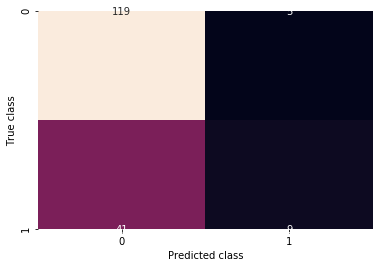

In [11]:
#confusion matrix
mat=confusion_matrix(y_test,y_pred)
confusion_matrix(y_test,y_pred)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [12]:
#roc_auc(train set)
prob1=result1.predict(x_train)
fpr1,tpr1,thresholds1=roc_curve(y_train,prob1)
roc_auc1=auc(fpr1,tpr1)
roc_auc1

0.736551724137931

In [13]:
#roc_auc(test set)
fpr,tpr,thresholds=roc_curve(y_test,probs)
roc_auc=auc(fpr,tpr)
roc_auc 

0.7743548387096775

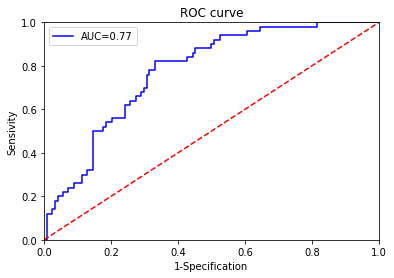

In [14]:
#Plot ROC curve
plt.title('ROC curve')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='best')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('Sensivity')
plt.xlabel('1-Specification')
plt.show()

In [15]:
#sensitivity,specification at various probability thresholds
pd.options.display.max_rows=200
pd.DataFrame({'Sensitivity':tpr,'1-Specification':fpr,'thresholds':thresholds})

,Sensitivity,1-Specification,thresholds
0,0.00,0.000000,1.654263e+00
1,0.00,0.008065,6.542628e-01
2,0.12,0.008065,5.493747e-01
3,0.12,0.024194,5.412678e-01
4,0.14,0.024194,5.401915e-01
5,0.14,0.032258,5.294512e-01
6,0.18,0.032258,5.078220e-01
7,0.18,0.040323,5.061733e-01
8,0.20,0.040323,4.990754e-01
9,0.20,0.056452,4.951406e-01
